In [1]:
import numpy as np
from pprint import pprint

import os 
from pathlib import Path

dir_path = str(Path(os.getcwd()).parent.absolute())
print(dir_path)

import sys
sys.path.append(dir_path)
if 'dwsimopt.sim_opt' in sys.modules:  # Is the module in the register?
    del sys.modules['dwsimopt.sim_opt']  # If so, remove it.
    del SimulationOptimization
from dwsimopt.sim_opt import SimulationOptimization

c:\Users\lfsfr\Desktop\dwsimopt


In [2]:
# Getting DWSIM path from system path
for k,v in enumerate(os.environ['path'].split(';')):
    if v.find('\DWSIM')>-1:
        path2dwsim = os.path.join(v, '')
if path2dwsim == None:
    path2dwsim = "C:\\Users\\lfsfr\\AppData\\Local\\DWSIM7\\"   #insert manuall
print(path2dwsim)

# Loading DWSIM simulation into Python (Simulation object)
sim_smr = SimulationOptimization(dof=np.array([]), path2sim= os.path.join(dir_path, "examples\\SMR_LNG\\SMR.dwxmz"), 
                     path2dwsim = path2dwsim)
sim_smr.savepath = os.path.join(dir_path, "examples\\SMR_LNG\\SMR2.dwxmz")
sim_smr.add_refs()

# Instanciate automation manager object
from DWSIM.Automation import Automation2
if ('interf' not in locals()):    # create automation manager
    interf = Automation2()

# Connect simulation in sim.path2sim
sim_smr.connect(interf)

C:\Users\lfsfr\AppData\Local\DWSIM7\
added refs
Simulation was loaded successfully


In [3]:
from dwsimopt.py2dwsim import * 

# Assign DoF:
create_pddx( ["MR-1", "CompoundMassFlow", "Nitrogen", "kg/s"],    sim_smr, element="dof" )
create_pddx( ["MR-1", "CompoundMassFlow", "Methane", "kg/s"],     sim_smr, element="dof" )
create_pddx( ["MR-1", "CompoundMassFlow", "Ethane", "kg/s"],      sim_smr, element="dof" )
create_pddx( ["MR-1", "CompoundMassFlow", "Propane", "kg/s"],     sim_smr, element="dof" )
create_pddx( ["MR-1", "CompoundMassFlow", "Isopentane", "Pa"],    sim_smr, element="dof" )
create_pddx( ["VALV-01", "OutletPressure", "Mixture", "Pa"],      sim_smr, element="dof" )
create_pddx( ["COMP-1", "OutletPressure", "Mixture", "Pa"],       sim_smr, element="dof" )
create_pddx( ["COOL-08", "OutletTemperature", "Mixture", "K"],    sim_smr, element="dof" )

# Assign F
create_pddx( ["Sum_W", "EnergyFlow", "Mixture", "kW"], sim_smr, element="fobj" )

# adding constraints (g_i <= 0):
g1 = create_pddx( ["MITA1-Calc", "OutputVariable", "mita", "°C"], sim_smr, element="constraint", assign=False )
assign_pddx( lambda: 3-g1[0]() , ["MITA1-Calc", "OutputVariable", "mita", "°C"], sim_smr, element="constraint" )
g2 = create_pddx( ["MITA2-Calc", "OutputVariable", "mita", "°C"], sim_smr, element="constraint", assign=False )
assign_pddx( lambda: 3-g2[0]() , ["MITA2-Calc", "OutputVariable", "mita", "°C"], sim_smr, element="constraint" )


pprint(vars(sim_smr))

{'dof': array([[<function toDwsim.<locals>.<lambda> at 0x000002C3F37B8C10>,
        'MR-1', 'CompoundMassFlow', 'Nitrogen', 'kg/s'],
       [<function toDwsim.<locals>.<lambda> at 0x000002C3F37B8DC0>,
        'MR-1', 'CompoundMassFlow', 'Methane', 'kg/s'],
       [<function toDwsim.<locals>.<lambda> at 0x000002C3F37B8E50>,
        'MR-1', 'CompoundMassFlow', 'Ethane', 'kg/s'],
       [<function toDwsim.<locals>.<lambda> at 0x000002C3F37B8EE0>,
        'MR-1', 'CompoundMassFlow', 'Propane', 'kg/s'],
       [<function toDwsim.<locals>.<lambda> at 0x000002C3F37B8F70>,
        'MR-1', 'CompoundMassFlow', 'Isopentane', 'Pa'],
       [<function toDwsim.<locals>.<lambda> at 0x000002C3F3ECE040>,
        'VALV-01', 'OutletPressure', 'Mixture', 'Pa'],
       [<function toDwsim.<locals>.<lambda> at 0x000002C3F3ECE0D0>,
        'COMP-1', 'OutletPressure', 'Mixture', 'Pa'],
       [<function toDwsim.<locals>.<lambda> at 0x000002C3F3ECE160>,
        'COOL-08', 'OutletTemperature', 'Mixture', 'K']], 

In [4]:
# Initial simulation optimization setup
# Initial guess of optimization
x0 = np.array( [0.25/3600, 0.70/3600, 1.0/3600, 1.10/3600, 1.80/3600, 2.50e5, 50.00e5, -60+273.15] )

# # Testing for simulation at x0
# sim_smr.calculate_optProblem(1.0*x0)
# print(sim_smr.x_val,
#       sim_smr.f_val,
#       sim_smr.g_val)

# # Test saving simulation at x0 in 'savepath'
# sim_smr.interface.SaveFlowsheet(sim_smr.flowsheet,sim_smr.savepath,True)

# Inspecting simulation object
pprint(vars(sim_smr))

{'dof': array([[<function toDwsim.<locals>.<lambda> at 0x000002C3F37B8C10>,
        'MR-1', 'CompoundMassFlow', 'Nitrogen', 'kg/s'],
       [<function toDwsim.<locals>.<lambda> at 0x000002C3F37B8DC0>,
        'MR-1', 'CompoundMassFlow', 'Methane', 'kg/s'],
       [<function toDwsim.<locals>.<lambda> at 0x000002C3F37B8E50>,
        'MR-1', 'CompoundMassFlow', 'Ethane', 'kg/s'],
       [<function toDwsim.<locals>.<lambda> at 0x000002C3F37B8EE0>,
        'MR-1', 'CompoundMassFlow', 'Propane', 'kg/s'],
       [<function toDwsim.<locals>.<lambda> at 0x000002C3F37B8F70>,
        'MR-1', 'CompoundMassFlow', 'Isopentane', 'Pa'],
       [<function toDwsim.<locals>.<lambda> at 0x000002C3F3ECE040>,
        'VALV-01', 'OutletPressure', 'Mixture', 'Pa'],
       [<function toDwsim.<locals>.<lambda> at 0x000002C3F3ECE0D0>,
        'COMP-1', 'OutletPressure', 'Mixture', 'Pa'],
       [<function toDwsim.<locals>.<lambda> at 0x000002C3F3ECE160>,
        'COOL-08', 'OutletTemperature', 'Mixture', 'K']], 

In [5]:
# Setup for optimization
# convergence tolerances
xtol=0.01
ftol=0.01
maxiter=5 # +- 20 seconds per iteration

# decision variables bounds
bounds_raw = np.array( [0.5*np.asarray(x0), 1.5*np.asarray(x0)] )   # 50 % around base case
bounds_raw[0][-1] = 153     # precool temperature low limit manually
bounds_raw[1][-1] = 253     # precool temperature upper limit manually

# regularizer calculation
regularizer = np.zeros(x0.size)
import math
for i in range(len(regularizer)):
    regularizer[i] = 10**(-1*math.floor(math.log(x0[i],10))) # regularizer for magnitude order of 1e0

# bounds regularized
bounds_reg = regularizer*bounds_raw

# objective and constraints lambda definitions
f = lambda x: sim_smr.calculate_optProblem(np.asarray(x)/regularizer)[0:sim_smr.n_f]
g = lambda x: sim_smr.calculate_optProblem(np.asarray(x)/regularizer)[sim_smr.n_f:(sim_smr.n_f+sim_smr.n_g)]

## Data generation for Surrogate Modeling

In [6]:
new_data = False

if new_data == True:
    # Setup Data
    n_train = 400
    n_test = 100

    # Design of experiments using pyDOE.lhs
    print(f"Bounds: {bounds_reg}")
    from pyDOE import lhs
    X_train = np.array( bounds_reg[1] - bounds_reg[0] )*lhs( sim_smr.n_dof, samples=n_train, criterion="maximin", iterations=100 )+ bounds_reg[0]
    X_test = np.array( bounds_reg[1] - bounds_reg[0] )*np.random.rand( n_test, sim_smr.n_dof ) + bounds_reg[0]
    Y_train = np.zeros( (n_train, sim_smr.n_f + sim_smr.n_g) )
    Y_test = np.zeros( (n_test, sim_smr.n_f + sim_smr.n_g) )
    # Data acquisition
    for i, x_ite in enumerate(X_train):
        Y_train[i] = sim_smr.calculate_optProblem(x_ite/regularizer)
    for i, x_ite in enumerate(X_test):
        Y_test[i] = sim_smr.calculate_optProblem(x_ite/regularizer)
else:
    path_data = "./data/2021-12-22_11-42-59/"
    X_train = np.genfromtxt(path_data+'X_train.csv', delimiter=',')
    X_test = np.genfromtxt(path_data+'X_test.csv', delimiter=',')
    Y_train = np.genfromtxt(path_data+'Y_train.csv', delimiter=',')
    Y_test = np.genfromtxt(path_data+'Y_test.csv', delimiter=',')

# Simple data analysis
for i in range(len(Y_train[0,:])):
    print(f"========== y_i={i} ===========")
    print(f"Mean============== Std================ Min==================== Max")
    print( np.mean(Y_train[:,i]), np.std(Y_train[:,i]), np.min(Y_train[:,i]), np.max(Y_train[:,i]) )
    print( np.mean(Y_test[:,i]), np.std(Y_test[:,i]), np.min(Y_test[:,i]), np.max(Y_test[:,i]) )

========== y_i=0 ===========
Mean============== Std================ Min==================== Max
0.38700531380035863 0.0605477498175754 0.2527936833959203 0.5398191151160806
0.3796311575704819 0.05431365944978647 0.257570811440421 0.5209477767704749
========== y_i=1 ===========
Mean============== Std================ Min==================== Max
7.895562521974062 13.280176560930016 -12.977222318350982 53.149455202837316
8.51383028839214 12.488451809000313 -7.748893241470483 49.551820111197
========== y_i=2 ===========
Mean============== Std================ Min==================== Max
-0.10435511636288436 4.806149070615685 -6.131566795066675 27.519632937692734
0.11810256972370724 5.103102406965769 -5.887926626957835 20.275673919475025


## Data Backup

In [7]:
if new_data==True
    import datetime
    import shutil

    datetime.datetime.now()
    now = str(datetime.datetime.now())
    now = now.replace(' ','_')
    now=now.split('.')[0]
    now=now.replace(':','-')
    os.mkdir('./data/'+now)
    np.savetxt('./data/'+now+'/X_train.csv', X_train, delimiter=",")
    np.savetxt('./data/'+now+'/X_test.csv', X_test, delimiter=",")
    np.savetxt('./data/'+now+'/Y_train.csv', Y_train, delimiter=",")
    np.savetxt('./data/'+now+'/Y_test.csv', Y_test, delimiter=",")
    with open('./data/'+now+'/sim.txt', 'w') as f:
        print(vars(sim_smr), file=f)
    shutil.copyfile( sim_smr.path2sim, './data/'+now+'/sim.dwxmz' )

SyntaxError: invalid syntax (Temp/ipykernel_15864/4258619020.py, line 1)

## Random Forest test

MAE: 0.010318123887245352
R2: 0.9463882158629585
Crossvalidation R2: [0.9473073  0.94088099 0.92853675 0.92434664 0.93927283]
MAE: 3.0681031868462707
R2: 0.8699538411544754
Crossvalidation R2: [0.86705185 0.85414855 0.78983492 0.87857007 0.89599067]
MAE: 1.1906995680706214
R2: 0.8675126450555526
Crossvalidation R2: [0.84772844 0.9089402  0.83440899 0.86451518 0.85347567]


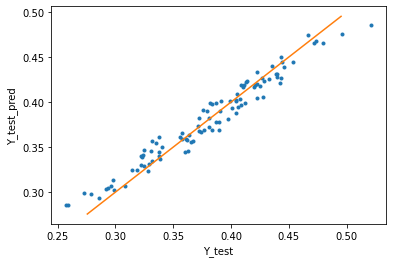

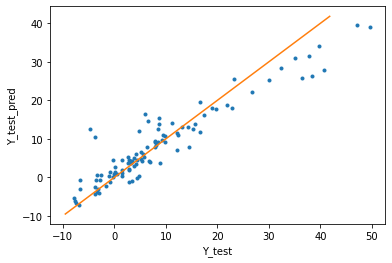

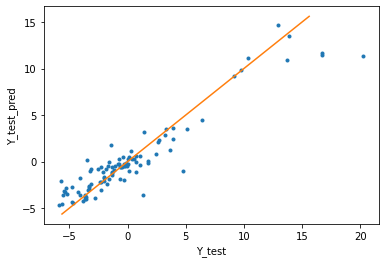

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

for i_pos in range(len(Y_train[0,:])):

    # creating and training Random Forest model
    m = RandomForestRegressor(n_estimators = 50, min_samples_leaf = 2, 
                                max_features = 0.5, n_jobs=-1, 
                                oob_score = True, random_state = 0)
    m.fit(X_train, Y_train[:,i_pos])
    Y_test_pred = m.predict(X_test)

    # plotando valores verdadeiros contra predições
    fig = plt.figure()
    plt.plot(Y_test[:,i_pos], Y_test_pred,'.')

    # plotando a reta x=y
    plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim())

    # legenda dos eixos
    plt.xlabel('Y_test')
    plt.ylabel('Y_test_pred')

    from sklearn.metrics import mean_absolute_error, r2_score
    mae = mean_absolute_error(Y_test[:,i_pos], Y_test_pred)
    r2 = r2_score(Y_test[:,i_pos], Y_test_pred)

    print(f'MAE: {mae}')
    print(f'R2: {r2}')

    # Crossvalidation
    from sklearn.model_selection import cross_val_score
    xval_results = cross_val_score(m, X_train, Y_train[:,i_pos], scoring='r2')
    print(f'Crossvalidation R2: {xval_results}')

## Gaussian Process test

MAE: 0.0037374079697167027
R2: 0.9889346542292449


c:\Users\lfsfr\Desktop\dwsimopt\venv\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\lfsfr\Desktop\dwsimopt\venv\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\Users\lfsfr\Desktop\dwsimopt\venv\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.ht

Crossvalidation R2: [0.98172551 0.9935872  0.96677893 0.99465791 0.99329186]
MAE: 2.098095366186556
R2: 0.927208848635038
Crossvalidation R2: [0.95405096 0.897956   0.85678384 0.91564858 0.91909831]
MAE: 1.173594660152488
R2: 0.9034969734844663
Crossvalidation R2: [0.83244389 0.88364412 0.92646991 0.85171083 0.90355674]


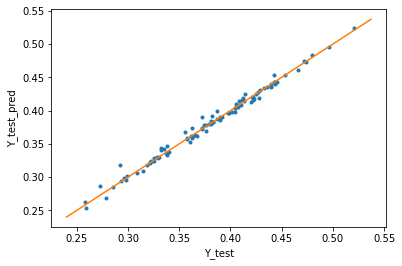

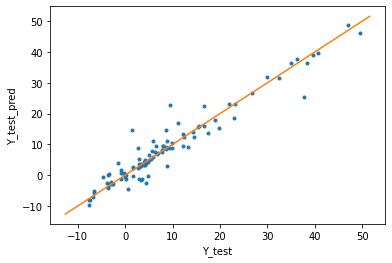

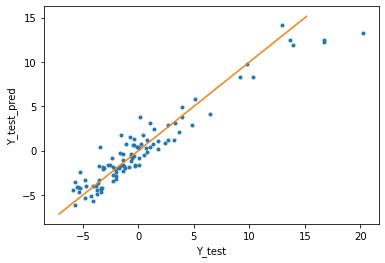

In [9]:
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt

for i_pos in range(len(Y_train[0,:])):

    # creating and training Random Forest model
    kernel = 1.0 * Matern(1., (1e-3, 1e2), nu=1.5)
    m_gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)
    # m_gpr = GaussianProcessRegressor(kernel=RBF())
    m_gpr.fit(X_train, Y_train[:,i_pos])
    Y_test_pred = m_gpr.predict(X_test)

    # plotando valores verdadeiros contra predições
    fig = plt.figure()
    plt.plot(Y_test[:,i_pos], Y_test_pred,'.')

    # plotando a reta x=y
    plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim())

    # legenda dos eixos
    plt.xlabel('Y_test')
    plt.ylabel('Y_test_pred')

    from sklearn.metrics import mean_absolute_error, r2_score
    mae = mean_absolute_error(Y_test[:,i_pos], Y_test_pred)
    r2 = r2_score(Y_test[:,i_pos], Y_test_pred)

    print(f'MAE: {mae}')
    print(f'R2: {r2}')

    # Crossvalidation
    from sklearn.model_selection import cross_val_score
    xval_results = cross_val_score(m_gpr, X_train, Y_train[:,i_pos], scoring='r2')
    print(f'Crossvalidation R2: {xval_results}')

## Model Slection

Modelo: média, desvio-padrão
-------------------
GaussianProcessRegressor: 0.986, 0.0107
RandomForestRegressor: 0.936, 0.00841
KNeighborsRegressor: 0.602, 0.0588
SVR: 0.286, 0.0396
BayesianRidge: 0.991, 0.0116
MLPRegressor: -0.177, 0.351
Modelo: média, desvio-padrão
-------------------
GaussianProcessRegressor: 0.909, 0.0317
RandomForestRegressor: 0.857, 0.0363
KNeighborsRegressor: 0.702, 0.0512
SVR: 0.427, 0.0477
BayesianRidge: 0.601, 0.0525
MLPRegressor: 0.389, 0.0671
Modelo: média, desvio-padrão
-------------------
GaussianProcessRegressor: 0.88, 0.034
RandomForestRegressor: 0.862, 0.0255
KNeighborsRegressor: 0.342, 0.0867
SVR: 0.2, 0.0733
BayesianRidge: 0.441, 0.119
MLPRegressor: 0.456, 0.0801


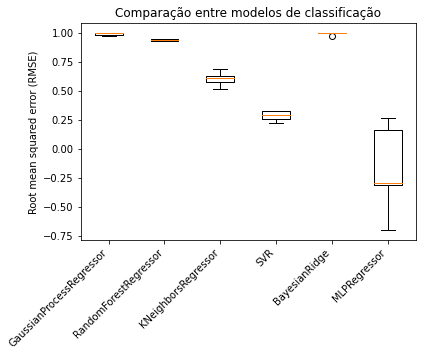

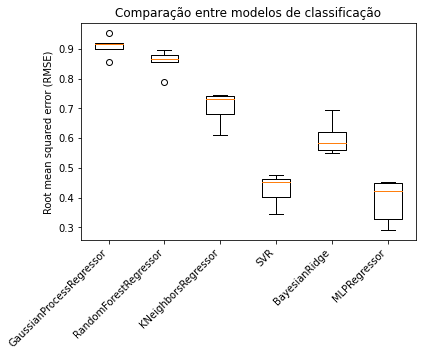

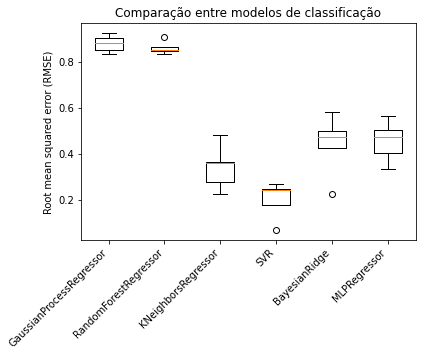

In [10]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.neural_network import MLPRegressor
import time

# t = time.time.
for i_pos in range(len(Y_train[0,:])):

    # especificando modelos 
    modelos = [
        GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20),
        RandomForestRegressor(n_estimators = 50, min_samples_leaf = 2, max_features = 0.5, n_jobs=-1, oob_score = True, random_state = 0),
        KNeighborsRegressor(),
        SVR(),
        BayesianRidge(),
        MLPRegressor()
    ]

    #lista para guardar resultados
    results = [0]*len(modelos)

    print('Modelo: média, desvio-padrão\n-------------------')

    for i in range(len(modelos)):
        
        # efetuando a validação cruzada!
        results[i] = cross_val_score(modelos[i], 
                                        X_train, Y_train[:,i_pos], 
                                        cv=5, 
                                        scoring='r2',
                                        n_jobs=-1)
        
        # imprimindo resultados
        print(f'{modelos[i].__class__.__name__}: {results[i].mean():.3}, {results[i].std():.3}')

    # plotando resultados
    fig, ax = plt.subplots()
    ax.boxplot(results)

    # formatando gráfico
    ax.set_xticklabels([modelos[i].__class__.__name__ for i in range(len(modelos))], 
                    rotation = 45, ha="right")
    ax.set_ylabel("Root mean squared error (RMSE)")
    ax.set_title('Comparação entre modelos de classificação')

### Model Selection Result
From the crossvalidation results of trainning, the bast model for this dataset is Bayesian Ridge for f, GaussianProcessRegressor for g1 and g2.

## Learning curves

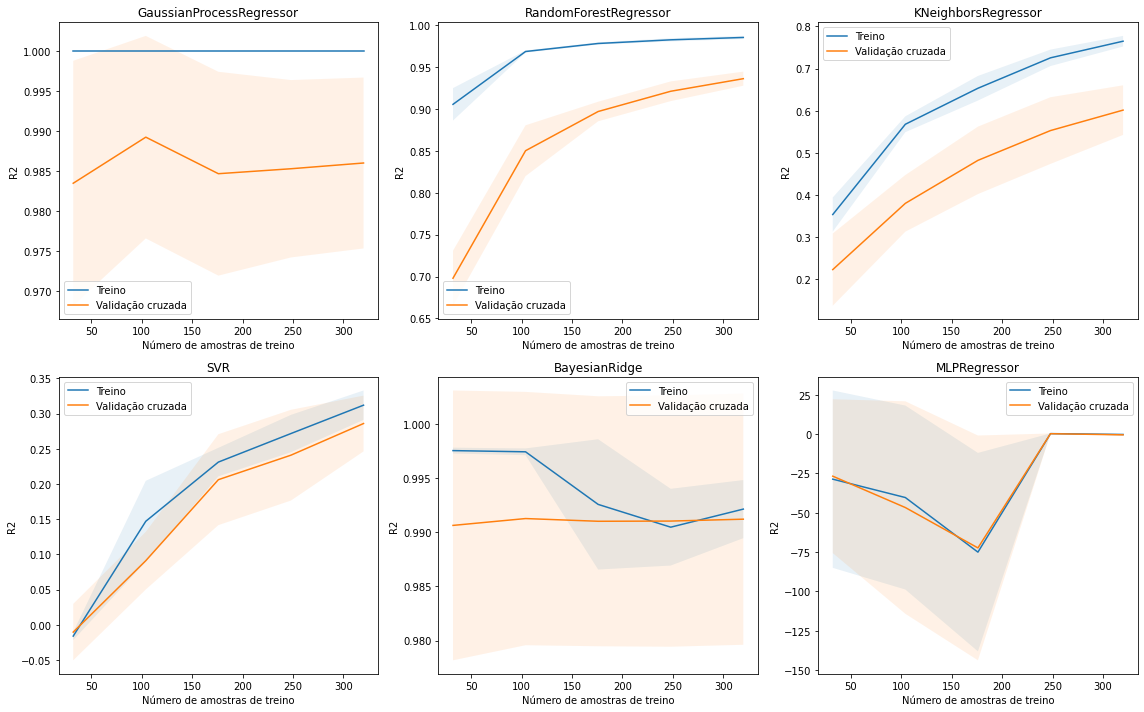

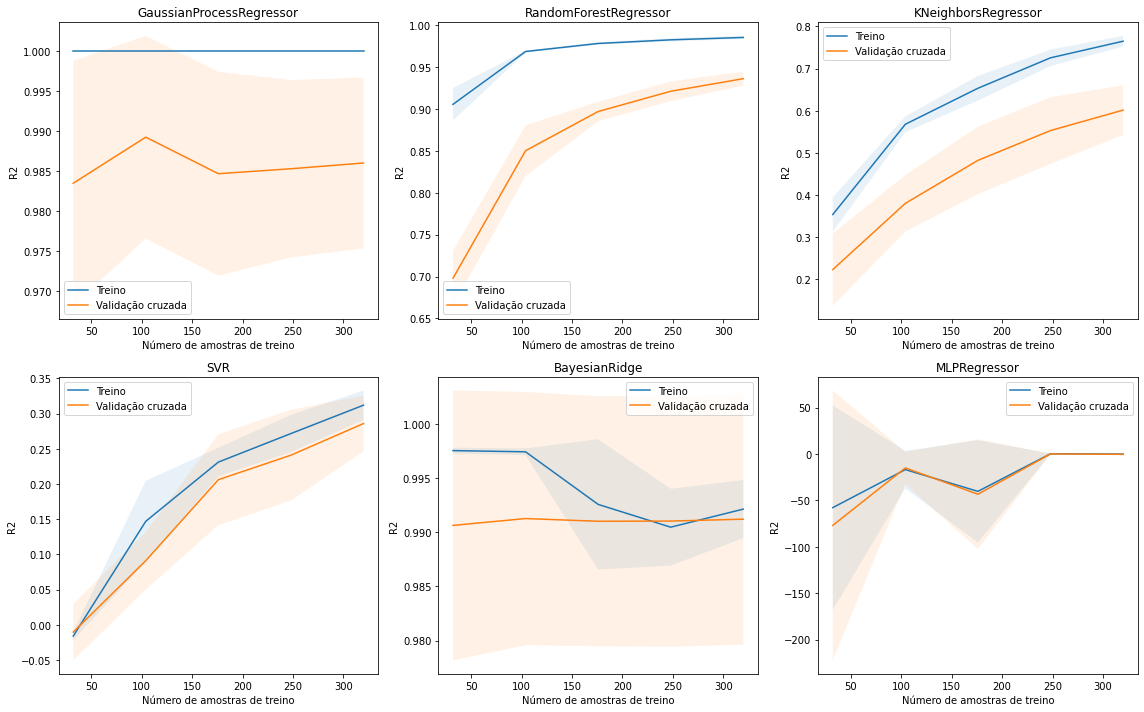

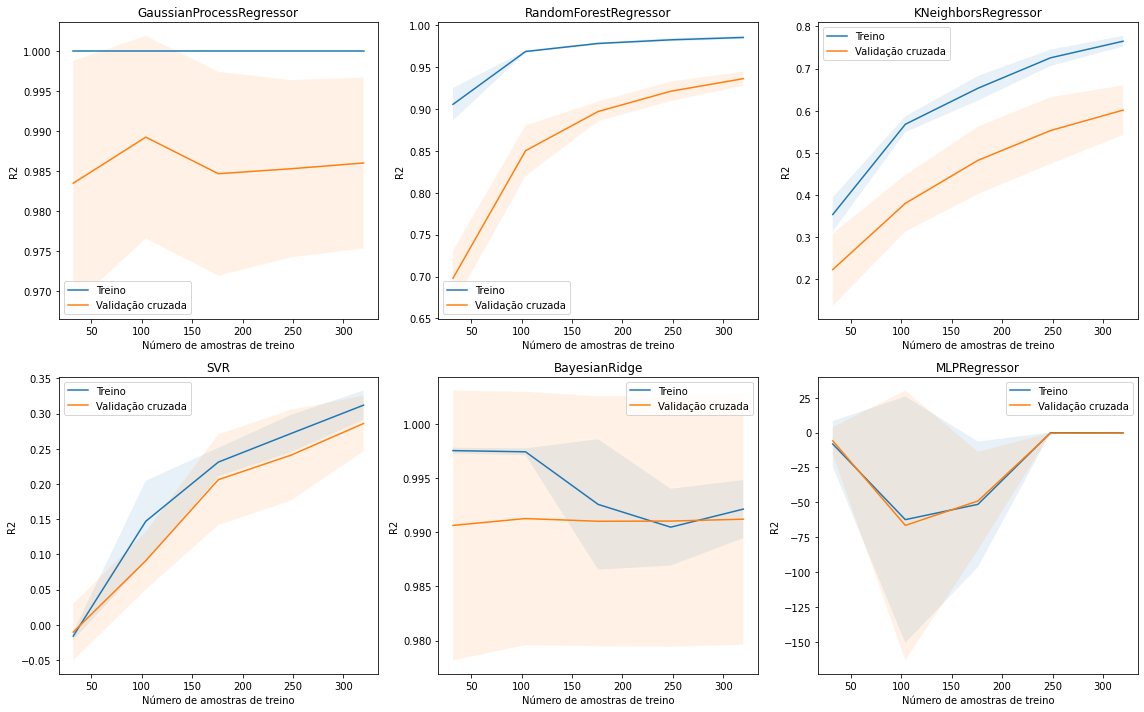

In [47]:
from sklearn.model_selection import learning_curve

for i_pos in range(len(Y_train[0,:])):
    
    fig, ax = plt.subplots(2,3,figsize=(16,10))

    i_pos = 0

    for i in range(len(modelos)):
        
        # calculando a curva de aprendizado!
        train_sizes, train_scores, test_scores = learning_curve(modelos[i], 
                                                                    X_train, Y_train[:,i_pos], 
                                                                    cv=5, 
                                                                    scoring='r2',
                                                                    n_jobs=-1)
        
        # médias e desvios-padrão dos resultados da validação cruzada (para cada ponto da curva)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        
        # plotando curva correspondente ao treino
        ax.ravel()[i].plot(train_sizes, train_scores_mean, label="Treino")
        ax.ravel()[i].fill_between(train_sizes, train_scores_mean - train_scores_std,
                                train_scores_mean + train_scores_std, alpha=0.1)
        
        # plotando curva correspondente ao teste
        ax.ravel()[i].plot(train_sizes, test_scores_mean, label="Validação cruzada")
        ax.ravel()[i].fill_between(train_sizes, test_scores_mean - test_scores_std,
                                test_scores_mean + test_scores_std, alpha=0.1)
        
        # formatando gráfico
        ax.ravel()[i].set_title(modelos[i].__class__.__name__)
        ax.ravel()[i].set_ylabel('R2')
        ax.ravel()[i].set_xlabel('Número de amostras de treino')
        ax.ravel()[i].legend(loc="best")
        

    fig.tight_layout()

### Learnin Curves Results
Random Forest and K-neighbors can benefit from more training data points

## Validation Curve

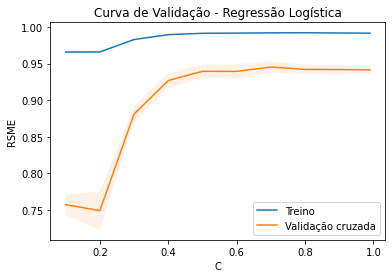

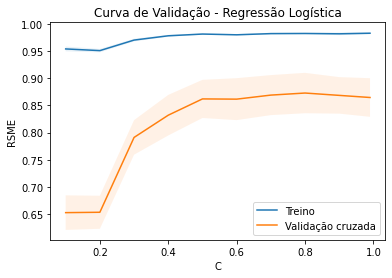

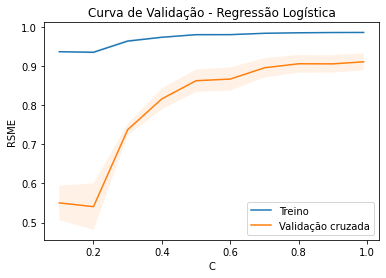

In [64]:
from sklearn.model_selection import validation_curve

#Curva de validação
# definindo os valores de parâmetros a serem testados
param_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]

for i_pos in range(len(Y_train[0,:])):

    # definindo o modelo
    m = RandomForestRegressor()

    # calculando a curva de validação!
    train_scores, test_scores = validation_curve(m, X_train, Y_train[:,i_pos], 
                                                    param_name="max_features", 
                                                    param_range=param_range,
                                                    scoring="r2", 
                                                    n_jobs=-1)

    # médias e desvios-padrão dos resultados da validação cruzada (para cada ponto da curva)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # plotando curva correspondente ao treino
    fig = plt.figure()
    plt.plot(param_range, train_scores_mean, label="Treino")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1)

    # plotando curva correspondente ao teste
    plt.plot(param_range, test_scores_mean, label="Validação cruzada")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1)

    # formatando gráfico
    plt.title("Curva de Validação - Regressão Logística")
    plt.xlabel('C')
    plt.ylabel("RSME")
    plt.legend(loc="best")

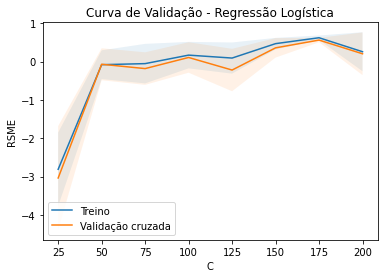

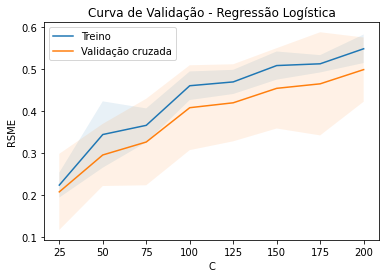

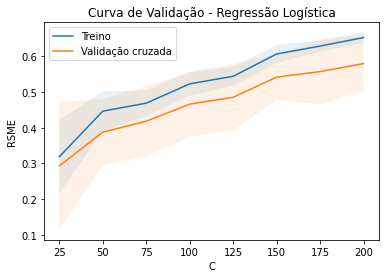

In [12]:
from sklearn.model_selection import validation_curve

#Curva de validação para MLP
# definindo os valores de parâmetros a serem testados
# param_range = [(25, 75), (50, 50), (75, 25), (100, 1)]
param_range = [25, 50, 75, 100, 125, 150, 175, 200]

for i_pos in range(len(Y_train[0,:])):

    # definindo o modelo
    m = MLPRegressor()

    # calculando a curva de validação!
    train_scores, test_scores = validation_curve(m, X_train, Y_train[:,i_pos], 
                                                    param_name="hidden_layer_sizes", 
                                                    param_range=param_range,
                                                    scoring="r2", 
                                                    n_jobs=-1)

    # médias e desvios-padrão dos resultados da validação cruzada (para cada ponto da curva)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # plotando curva correspondente ao treino
    plt.figure()
    plt.plot(param_range, train_scores_mean, label="Treino")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1)

    # plotando curva correspondente ao teste
    plt.plot(param_range, test_scores_mean, label="Validação cruzada")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1)

    # formatando gráfico
    plt.title("Curva de Validação - ANN")
    plt.xlabel('C')
    plt.ylabel("R2")
    plt.legend(loc="best")

# Surrogate-based Optimization
From Model Selection, we have that `BayesRidge` is a good surrogate choice for `f` and `GaussianProcess` is for `g`

In [22]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, r2_score

i_pos = 0
m_f = BayesianRidge()
m_f.fit(X_train, Y_train[:,i_pos])
Y_test_pred = m_f.predict(X_test)
mae = mean_absolute_error(Y_test[:,i_pos], Y_test_pred)
r2 = r2_score(Y_test[:,i_pos], Y_test_pred)
print("------ TESTING: f")
print(f'MAE: {mae}')
print(f'R2: {r2}')


kernel = 1.0 * Matern(1., (1e-3, 1e2), nu=1.5)
m_g = [GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)]*2

i_pos = 1
m_g[i_pos-1].fit(X_train, Y_train[:,i_pos])
Y_test_pred = m_g[i_pos-1].predict(X_test)
mae = mean_absolute_error(Y_test[:,i_pos], Y_test_pred)
r2 = r2_score(Y_test[:,i_pos], Y_test_pred)
print("------ TESTING: g1")
print(f'MAE: {mae}')
print(f'R2: {r2}')

i_pos = 2
m_g[i_pos-1].fit(X_train, Y_train[:,i_pos])
Y_test_pred = m_g[i_pos-1].predict(X_test)
mae = mean_absolute_error(Y_test[:,i_pos], Y_test_pred)
r2 = r2_score(Y_test[:,i_pos], Y_test_pred)
print("------ TESTING: g2")
print(f'MAE: {mae}')
print(f'R2: {r2}')

# print("Crossvalidation")
# print('Modelo: média, desvio-padrão\n-------------------')
# # efetuando a validação cruzada!
# results_f = cross_val_score(m_f, 
#                             X_train, Y_train[:,0], 
#                             cv=5, 
#                             scoring='r2',
#                             n_jobs=-1)

# # imprimindo resultados
# print(f'{results_f.__class__.__name__}: {results_f.mean():.3}, {results_f.std():.3}')


------ TESTING: f
MAE: 0.002224993672589592
R2: 0.9956984010217338
------ TESTING: g1
MAE: 2.09809536322061
R2: 0.9272088488872485
------ TESTING: g2
MAE: 1.1735945286538152
R2: 0.9034969987780956


In [79]:
def f_hat(x):
    if np.size(x) > sim_smr.n_dof:
        return m_f.predict( x )
    else:
        return m_f.predict( x.reshape(1, -1) )

def g1_hat(x):
    if np.size(x) > sim_smr.n_dof:
        return m_g[0].predict( x )
    else:
        return m_g[0].predict( x.reshape(1, -1) )

def g2_hat(x):
    if np.size(x) > sim_smr.n_dof:
        return m_g[1].predict( x )
    else:
        return m_g[1].predict( x.reshape(1, -1) )

# Global optimization with PSO
from sko.PSO import PSO

f_pen = lambda x: f_hat(x) + 1000*max(0,g1_hat(x)) + 1000*max(0,g2_hat(x))
result_pso = PSO(func= f_pen, n_dim=sim_smr.n_dof, pop=3*sim_smr.n_dof, max_iter=20*sim_smr.n_dof, lb=bounds_reg[0], ub=bounds_reg[1], verbose=False)
result_pso.record_mode = True
if sim_smr.n_f > 1:
    print("Multi-objective optimization not supported (yet)")
elif sim_smr.n_f < 1:
    print("Invalid number of objective functions")
else:
    print("Starting global optimization")
    result_pso.run()



Starting global optimization


f = [0.27392271], g = [54.58223348  0.50767925] at x = [5.21326206e-05 9.72222222e-05 2.90274762e-04 1.52777778e-04
 2.50000000e-04 2.24617804e+05 6.13043703e+06 2.53000000e+02]
[0.27289915]
[-9.4002462e-07]
[-9.4002462e-07]


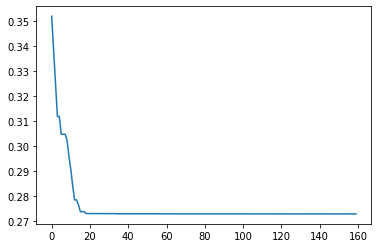

In [81]:
import matplotlib.pyplot as plt

sim_smr.calculate_optProblem( result_pso.gbest_x/regularizer )
print(f_hat(result_pso.gbest_x))
print(g1_hat(result_pso.gbest_x))
print(g2_hat(result_pso.gbest_x))
sim_smr.interface.SaveFlowsheet(sim_smr.flowsheet, sim_smr.savepath,True)

plt.plot(result_pso.gbest_y_hist)
plt.show()